In [ ]:
Baseball Project
The data files for this project was taken from the site http://www.seanlahman.com/baseball-archive/statistics/
I downloaded the CSV version for 2015
The questions I wanted to ask of the data was:
* Does the average salary of a team play a major role in determining if they would win the world series? In other words, does it mean that having a high payroll will greatly assist in winning a world series?
* If not, what are other stats that can be used to help determine as to how they would win the world series? 


Import all the modules necessary to make the analysis in the cell below:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Loading all the data into datframes 

master_df = pd.read_csv('./baseballdatabank-master/core/Master.csv')
batting_df = pd.read_csv('./baseballdatabank-master/core/Batting.csv')
pitching_df = pd.read_csv('./baseballdatabank-master/core/Pitching.csv')
fielding_df = pd.read_csv('./baseballdatabank-master/core/Fielding.csv')

teams_df = pd.read_csv('./baseballdatabank-master/core/Teams.csv')
schools_df = pd.read_csv('./baseballdatabank-master/core/Schools.csv')
appearances_df = pd.read_csv('./baseballdatabank-master/core/Appearances.csv')
schoolplayed_df = pd.read_csv('./baseballdatabank-master/core/CollegePlaying.csv')
salaries_df = pd.read_csv('./baseballdatabank-master/core/Salaries.csv')

postseries_df = pd.read_csv('./baseballdatabank-master/core/SeriesPost.csv')
postbatting_df = pd.read_csv('./baseballdatabank-master/core/BattingPost.csv')
postpitching_df = pd.read_csv('./baseballdatabank-master/core/PitchingPost.csv')
postfielding_df = pd.read_csv('./baseballdatabank-master/core/FieldingPost.csv')

franchises_df = pd.read_csv('./baseballdatabank-master/core/TeamsFranchises.csv')



Due to the question of what makes a World Series winner is at the team level rather than at the level of the individual player, the teams_df dataframe is the one of most importance as it had statistics at the team level. This helped with the investigating the data at a team level. Particularly for World Series championship teams

In [8]:
print(teams_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 48 columns):
yearID            2805 non-null int64
lgID              2755 non-null object
teamID            2805 non-null object
franchID          2805 non-null object
divID             1288 non-null object
Rank              2805 non-null int64
G                 2805 non-null int64
Ghome             2406 non-null float64
W                 2805 non-null int64
L                 2805 non-null int64
DivWin            1260 non-null object
WCWin             624 non-null object
LgWin             2777 non-null object
WSWin             2448 non-null object
R                 2805 non-null int64
AB                2805 non-null int64
H                 2805 non-null int64
2B                2805 non-null int64
3B                2805 non-null int64
HR                2805 non-null int64
BB                2805 non-null int64
SO                2685 non-null float64
SB                2661 non-null float64
CS    

Of particular note were 2 columns teamID and franchID as shown above.
In investigating data in the teams_df dataframe it was found that there are instances where one franchID value maps to 1 or more teamID values. 
For example franchID of FLA maps to teamID of FLO and MIA (shown below). 

In [10]:
print (teams_df.loc[teams_df["franchID"] == "FLA"][["yearID", "teamID", "franchID", "name"]])

      yearID teamID franchID             name
2135    1993    FLO      FLA  Florida Marlins
2163    1994    FLO      FLA  Florida Marlins
2191    1995    FLO      FLA  Florida Marlins
2219    1996    FLO      FLA  Florida Marlins
2247    1997    FLO      FLA  Florida Marlins
2276    1998    FLO      FLA  Florida Marlins
2306    1999    FLO      FLA  Florida Marlins
2336    2000    FLO      FLA  Florida Marlins
2366    2001    FLO      FLA  Florida Marlins
2396    2002    FLO      FLA  Florida Marlins
2426    2003    FLO      FLA  Florida Marlins
2456    2004    FLO      FLA  Florida Marlins
2485    2005    FLO      FLA  Florida Marlins
2515    2006    FLO      FLA  Florida Marlins
2545    2007    FLO      FLA  Florida Marlins
2575    2008    FLO      FLA  Florida Marlins
2605    2009    FLO      FLA  Florida Marlins
2635    2010    FLO      FLA  Florida Marlins
2665    2011    FLO      FLA  Florida Marlins
2699    2012    MIA      FLA    Miami Marlins
2729    2013    MIA      FLA    Mi

From above, Both the Florida Marlins (1993 - 2011) and Miami Marlins (2012 - 2015) have the same franchID. So any
data from 1993 to 2015 will point to the same franchID value but 2 different values for teamID. So even though the teams move from location to location or are renamed, they still below to the same franchise. Therefore to 
investigate the datasets from a team perspective, it would make sense to investigate at the franchise level (franchID)
as oppose at the team level (teamID). This provides some form of continuity when looking at the data as they are owned by the same franchise.

For this analysis, in addition to the teams_df dataframe, the dataframes of postseries_df and salaries_df would be
used. It was observed that the franchID column was missing in the postseries_df and salaries_df dataframes.

In [5]:
print postseries_df.info() #This dataframe shows the World Series Winners

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 9 columns):
yearID          307 non-null int64
round           307 non-null object
teamIDwinner    307 non-null object
lgIDwinner      307 non-null object
teamIDloser     307 non-null object
lgIDloser       307 non-null object
wins            307 non-null int64
losses          307 non-null int64
ties            307 non-null int64
dtypes: int64(4), object(5)
memory usage: 21.7+ KB
None


In [6]:
print salaries_df.info() #This dataframe shows the salaries of the individual players for each year and team

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25575 entries, 0 to 25574
Data columns (total 5 columns):
yearID      25575 non-null int64
teamID      25575 non-null object
lgID        25575 non-null object
playerID    25575 non-null object
salary      25575 non-null int64
dtypes: int64(2), object(3)
memory usage: 999.1+ KB
None


=====================================================================================================================

It was decided to  create a cross-reference dataframe that has a teamID column with it's corresponding franchID column. This was to be merged with any dataframe that contained the teamID column but missing the franchID column.  Thereby creating a franchID column after the merge.
The cross-reference dataframe (teams_franch_crossref_df) was created by merging the teams_df and the franchises_df dataframes. Duplicate values were then dropped.

In [7]:
teams_temp_df = pd.merge(left=teams_df, right=franchises_df, on="franchID", how="inner").filter(items = ["teamID","franchID","franchName"])
teams_franch_crossref_df = teams_temp_df.drop_duplicates() 

In [8]:
teams_franch_crossref_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 2787
Data columns (total 3 columns):
teamID        151 non-null object
franchID      151 non-null object
franchName    151 non-null object
dtypes: object(3)
memory usage: 4.7+ KB


=====================================================================================================================
Creating a new salaries dataframe which contains the franchID column by merging the salaries_df and teams_franch_crossref_df. Only results from Year 2000 and above are considered. It will be explained later on in this analysis as to why only data from the years 2000 and above were chosen.

In [9]:
salaries_franchise_df = pd.merge(salaries_df, teams_franch_crossref_df, on="teamID", how="inner")

print salaries_franchise_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25894 entries, 0 to 25893
Data columns (total 7 columns):
yearID        25894 non-null int64
teamID        25894 non-null object
lgID          25894 non-null object
playerID      25894 non-null object
salary        25894 non-null int64
franchID      25894 non-null object
franchName    25894 non-null object
dtypes: int64(2), object(5)
memory usage: 1.6+ MB
None


=====================================================================================================================
Creating a new World Series winners dataframe which will contain both a list of the winning team and their corresponding franchID column by merging the postseries_df and teams_franch_crossref_df. Only results from Year 2000 and above are considered. It will be explained later on in this analysis as to why only data from the years 2000 and above were chosen.

In [10]:
postseries_franchise = pd.merge(left=postseries_df, right=teams_franch_crossref_df, left_on="teamIDwinner", right_on="teamID", how="inner").filter(items = ["yearID","round","teamIDwinner","lgIDwinner","franchID","franchName"])

print postseries_franchise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 6 columns):
yearID          303 non-null int64
round           303 non-null object
teamIDwinner    303 non-null object
lgIDwinner      303 non-null object
franchID        303 non-null object
franchName      303 non-null object
dtypes: int64(1), object(5)
memory usage: 16.6+ KB
None


Two new dataframes have been created i.e. postseries_franchise and salaries_franchise_df. So now the three dataframes
postseries_franchise, salaries_franchise_df and teams_df can be joined using the column franchID.

Now the next problem is from what year should the data be analysed from. Looking at the salaries_franchise_df dataframe, it was found to have data as only far back as 1985. The plot of the dataframe is seen below.

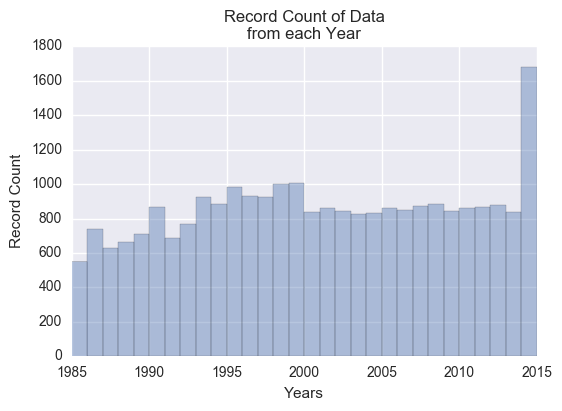

In [11]:
sns.distplot(salaries_franchise_df.yearID, kde = False)
plt.title('Record Count of Data\nfrom each Year')
plt.ylabel('Record Count')
plt.xlabel('Years')

Due to the data captured for salaries as shown above, goes only as far back as 1985, so it makes sense to use data in other dataframes from 1985 onwards for analysis. 

The next place to look at was the teams_df dataframe post-1985 in order to see how much data is available there. Looked at two columns in particular ie Sacrifice Fly (SF) and Hit By a Pitch (HBP). See below:

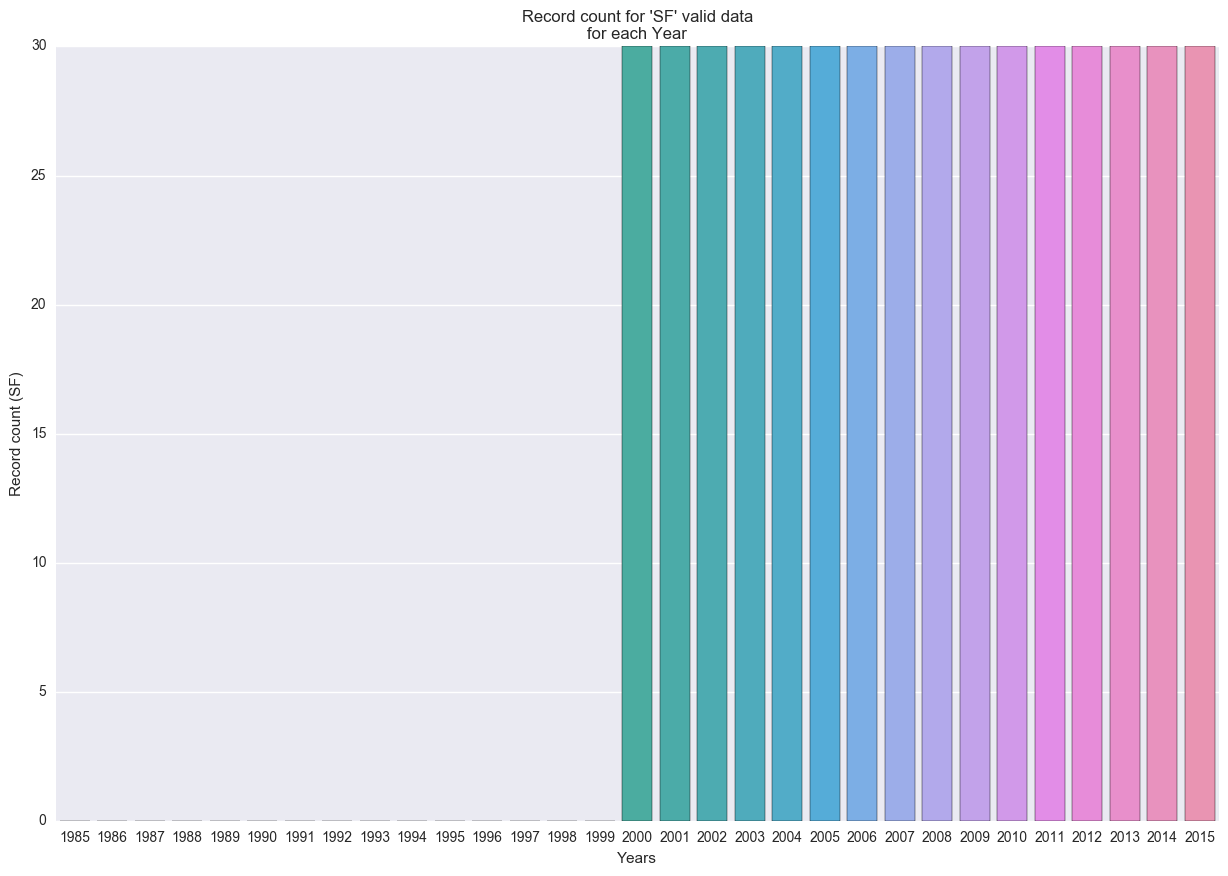

In [12]:
# Creating a new dataframe containing values of SF and HBP for years 1985 to 2015 so as to match the available
# salary data.
teams_hbp_sf = teams_df.filter(items = ["yearID","SF","HBP"]) 
sf_hbp_count = teams_hbp_sf.groupby("yearID").count() # Doing a count of records that have data by Year

sf_hbp_count_tab = sf_hbp_count.reset_index() # Creating a table from that data

# plotting the results
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
#plotting the count of SF column below
ax = sns.barplot(x="yearID", y = "SF", data=sf_hbp_count_tab.loc[sf_hbp_count_tab["yearID"] >= 1985])
plt.title("Record count for 'SF' valid data\nfor each Year")
plt.xlabel("Years")
plt.ylabel("Record count (SF)")


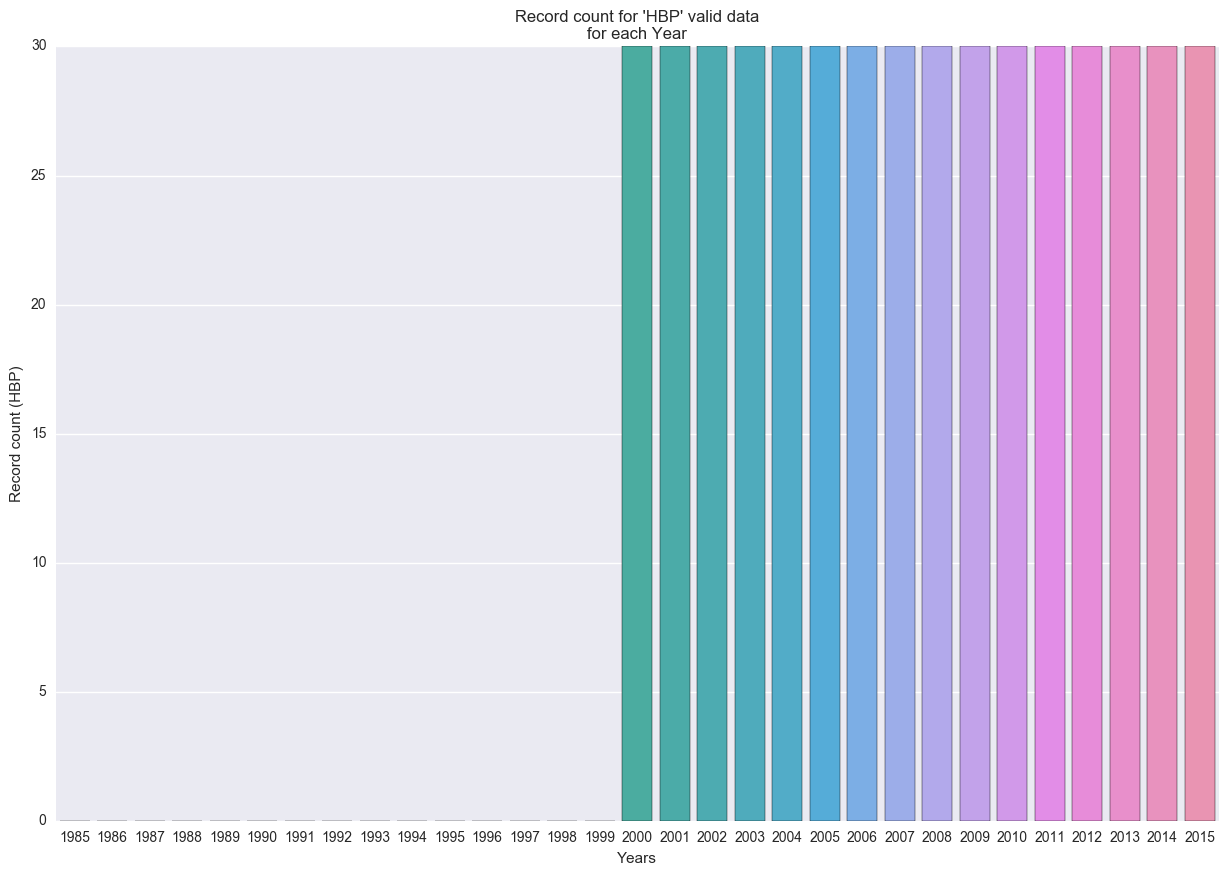

In [13]:
# plotting the results
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
#plotting the count of HBP column below
ax = sns.barplot(x="yearID", y = "HBP", data=sf_hbp_count_tab.loc[sf_hbp_count_tab["yearID"] >= 1985])
plt.title("Record count for 'HBP' valid data\nfor each Year")
plt.xlabel("Years")
plt.ylabel("Record count (HBP)")

From the above 2 graphs, it looks like there is data missing from 1985 to 2000 for both the SF and HBP columns in the teams_df dataframe. 
As a result, in  order to provide meaningful analysis, the range of years over which the analysis will be done is from 2000 to 2015 for the following dataframes:
* teams_df
* salaries_franchise_df
* postseries_franchise

The above mentioned dataframes now contain the franchID column will allow to present the data at a franchise level.

In [14]:
# Below we go on further, we want to create a dataframe showing all the World Series winners from 2000 onwards.
# This dataframe will allow us to look at the World Series and compare with the rest of the League.
ws_winners_franchise = postseries_franchise[(postseries_franchise['yearID'] >= 2000) & (postseries_franchise['round'] == "WS")].sort_values(by="yearID", ascending=True)

## Salary Analysis

Now, the average salary players are going to be analysed to see what effect there is on the World Series winners.

In [15]:
# based on the decision to look at data for years 2000 onwards, creating a new dataframe
salaries_franchise_yr2000 = salaries_franchise_df.loc[salaries_franchise_df["yearID"] >= 2000]

In [16]:
# To create a dataframe that holds the average salary of the players throughout the league for years 2000 - 2015
grpby_yr_sal = salaries_franchise_yr2000.groupby(["yearID"]) # Grouping the salaries by year
year_sal_mean = grpby_yr_sal.mean() # Calculating the mean of salaries by year
year_sal_mean_tab = year_sal_mean.reset_index() # Resetting the data into a dataframe

# To create a dataframe that holds the average salary of the players for each franchise
# throughout the league for years 2000 - 2015
grpby_yr_franchise_sal = salaries_franchise_yr2000.groupby(["yearID","franchID"]) # Grouping the salaries by year and franchise
franchise_sal_mean = grpby_yr_franchise_sal.mean() #Calculating the mean for salaries by fanchise for each year
franch_sal_mean_tab = franchise_sal_mean.reset_index() # Resetting the data into a dataframe

# A new dataframe is created by merging the World Series winners dataframe "ws_winners_franchise" and the
# average salary by franchise "franch_sal_mean_tab" for years 2000 to 2015
ws_win_avg_sal = pd.merge(left=ws_winners_franchise, right=franch_sal_mean_tab, left_on=["yearID", "franchID"], right_on=["yearID","franchID"]).sort_values(by="yearID", ascending=True)
print ws_win_avg_sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 7 columns):
yearID          16 non-null int64
round           16 non-null object
teamIDwinner    16 non-null object
lgIDwinner      16 non-null object
franchID        16 non-null object
franchName      16 non-null object
salary          16 non-null int64
dtypes: int64(2), object(5)
memory usage: 1.0+ KB
None


In [17]:
# Creating an array from the dataframes, so the results can be plotted in a graph.

# A Series of the mean Salaries for each of the winners of the WorldSeries for Years 2000 to 2015

ws_winners_sal = pd.Series(ws_win_avg_sal["salary"]) 
ws_years = pd.Series(ws_win_avg_sal["yearID"])

years_series = pd.Series(salaries_franchise_yr2000["yearID"].unique())
franchise_series = pd.Series(salaries_franchise_yr2000["franchID"].unique())
year_sal_series = pd.Series(year_sal_mean.reset_index()["salary"])

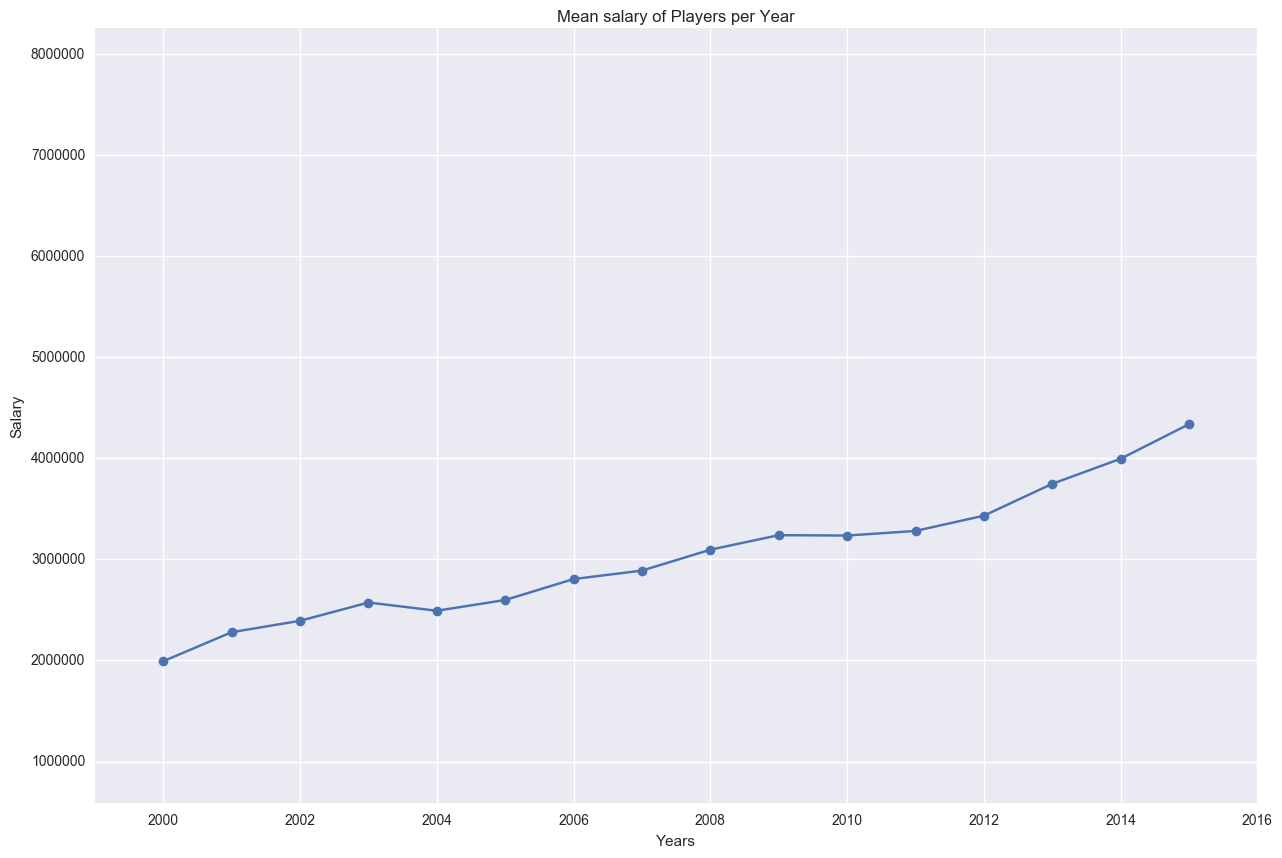

In [18]:
# Plotting the average salary of a player in Major League Baseball (MLB)
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
plt.plot(years_series, year_sal_series, marker = "o")
plt.xlim(ws_years.min() - 1, ws_years.max() + 1)
plt.ylim(franch_sal_mean_tab["salary"].min(), franch_sal_mean_tab["salary"].max())
plt.xlabel("Years")
plt.ylabel("Salary")
plt.title("Mean salary of Players per Year")
plt.show()

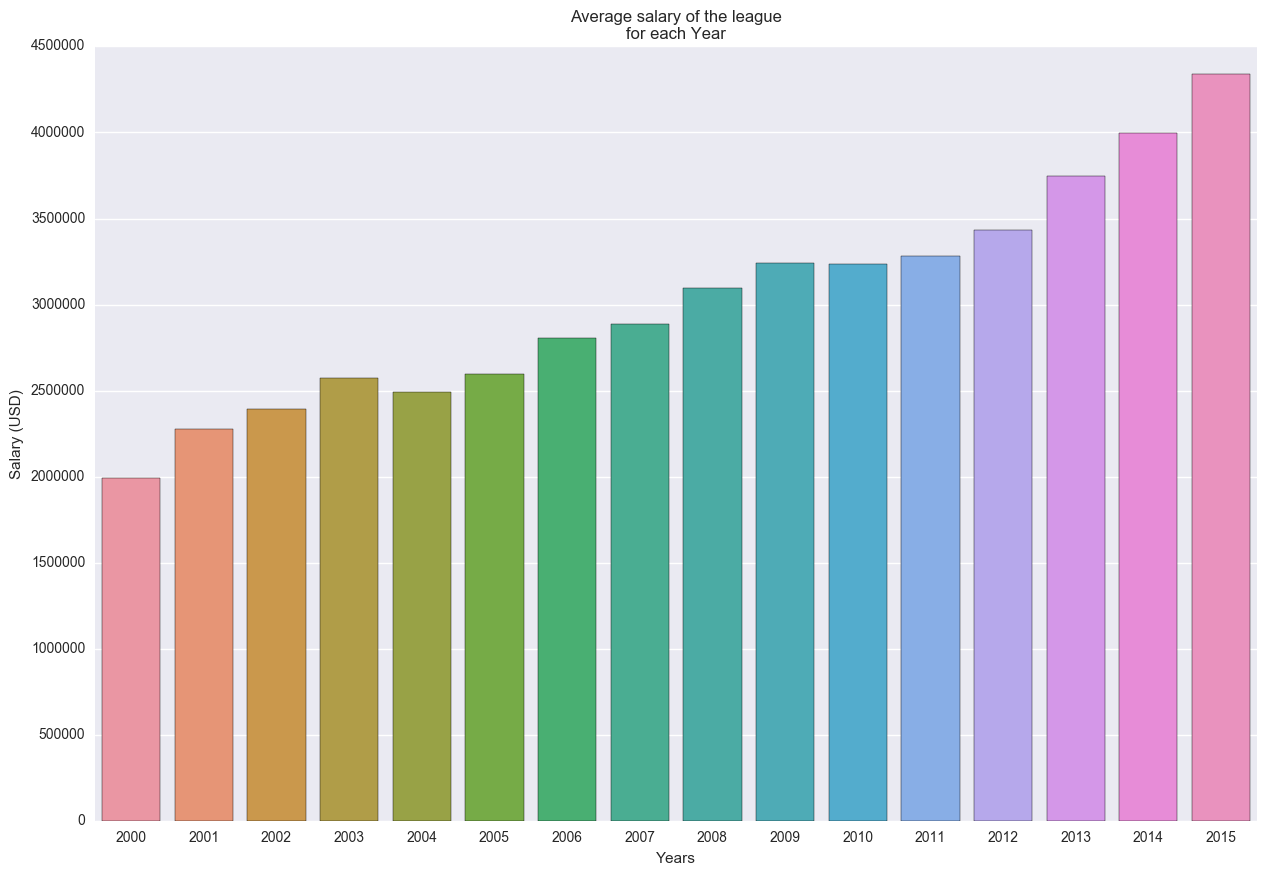

In [19]:
# Setting the size of the dimensions for the plt
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
#plotting the count of HBP column below
ax = sns.barplot(x="yearID", y = "salary", data=year_sal_mean_tab)
#plt.xlim(ws_years.min() - 1, ws_years.max() + 1)
plt.title("Average salary of the league\nfor each Year")
plt.xlabel("Years")
plt.ylabel("Salary (USD)")

The above two plots of the same data shows that the average salary of baseball players has gradually increased each year from 2000 to 2015 with the exception of 2004 where it is a slight decrease. This is just an example to show that I could plot the average salary of the league for each year from 2000 to 2015 in 2 different ways. It just gave me a bit of confidence :-)

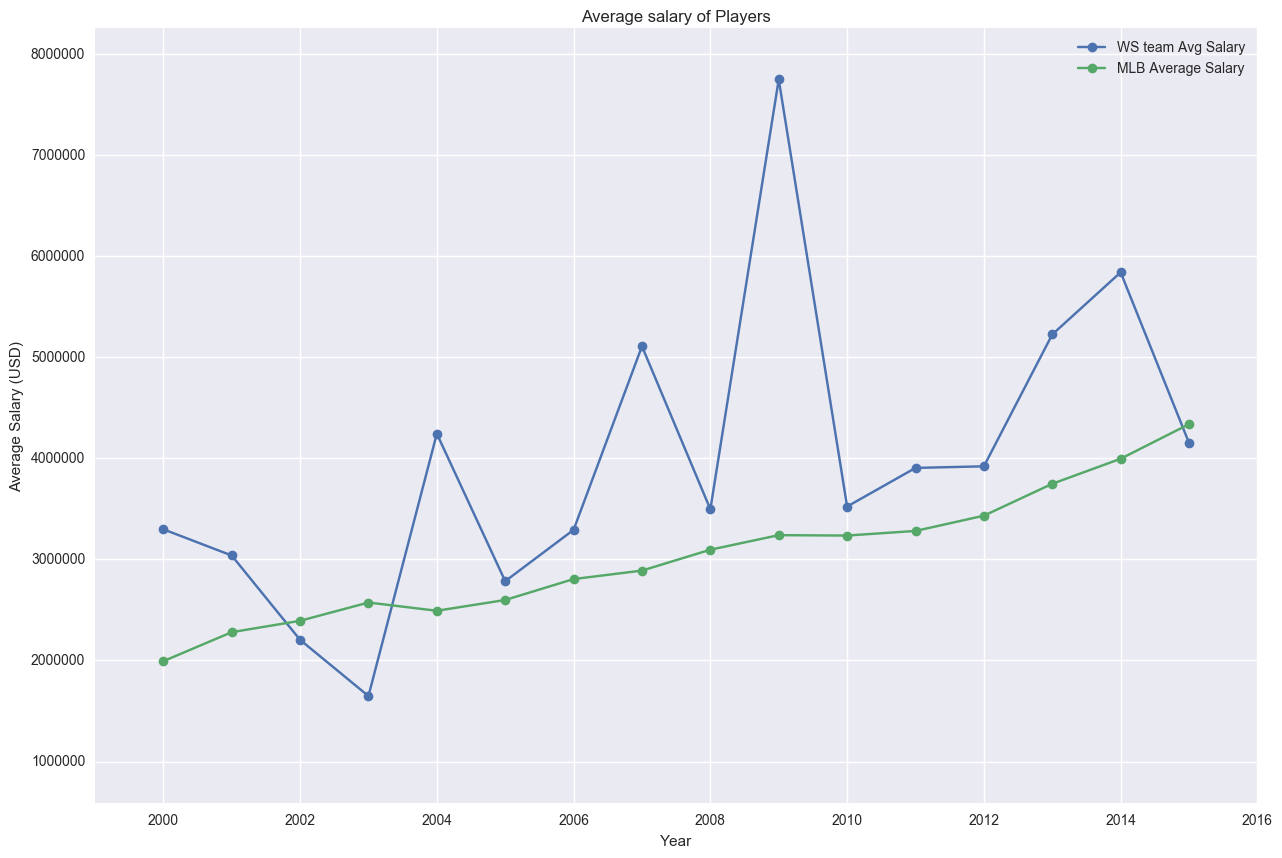

In [20]:
# Setting the size of the dimensions for the plt
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)

# This is a graph plot of the avg player's income for the Franchise that won the World Series that compares against
# the average salary for a player in Baseball.
plt.plot(ws_years, ws_winners_sal, marker = "o", label = "WS team Avg Salary")
plt.plot(ws_years, year_sal_series, marker = "o", label = "MLB Average Salary")
plt.xlim(ws_years.min() - 1, ws_years.max() + 1)
plt.ylim(franch_sal_mean_tab["salary"].min(), franch_sal_mean_tab["salary"].max())
plt.xlabel("Year")
plt.ylabel("Average Salary (USD)")
plt.title("Average salary of Players")
plt.legend()

plt.show()


### Salary Analysis

With the exception of the 2002, 2003 & 2015 World Series winners, the average salaries of the winners are above
the average salary of the Baseball league. The 2005, 2006, 2008, 2010, 2011 & 2012 winners average salary
was pretty close to the league's average even though they were above average. So it didn't seem to be a convincing argument that salary played a  major role in deciding who would win the World Series. So other factors will need to be investigated.



## On Base Percentage (OBP) and Walks and hits per inning pitched (WHIP) analysis

In searching for valid stats that could be used, the document "https://www.iwu.edu/economics/PPE13/houser.pdf" was found through a google search.
In the conclusion it stated "On Base Percentage" (OBP) and "Walks and hits per inning pitched" (WHIP), are 
2 stats that define what players should be invested in. It was decided to take those 2 stats and calculate them 
at the team level.

The data frame teams_df are missing columns  OBP or WHIP. This can be seen below:


In [21]:
print teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 48 columns):
yearID            2805 non-null int64
lgID              2755 non-null object
teamID            2805 non-null object
franchID          2805 non-null object
divID             1288 non-null object
Rank              2805 non-null int64
G                 2805 non-null int64
Ghome             2406 non-null float64
W                 2805 non-null int64
L                 2805 non-null int64
DivWin            1260 non-null object
WCWin             624 non-null object
LgWin             2777 non-null object
WSWin             2448 non-null object
R                 2805 non-null int64
AB                2805 non-null int64
H                 2805 non-null int64
2B                2805 non-null int64
3B                2805 non-null int64
HR                2805 non-null int64
BB                2805 non-null int64
SO                2685 non-null float64
SB                2661 non-null float64
CS    

The values for OBP and WHIP can be calculated and added to the teams_df dataframe. This is because the values used to calculate the two columns are available in the teams_df dataframe.

As stated by Wikipedia, OBP is a measure of how often a batter reaches base for any reason other than a fielding error, fielder's choice, dropped/uncaught third strike, fielder's obstruction, or catcher's interference.

In [22]:
# Calculation OBP = (H+BB+HBP)/(AB+BB+HBP+SF)

def calc_obp(row):
    top_num = (row["H"] + row["BB"] + row["HBP"])
    bot_num = (row["AB"] + row["BB"] + row["HBP"] + row["SF"])
    if bot_num == 0:
        return 0
    else:
        return top_num/bot_num

According to Wikipedia, WHIP is Walks and hits per inning pitched (WHIP). It's average number of walks and hits allowed by the pitcher per inning.

In [23]:
# Calculation WHIP = (BB + H)/(IPOuts/3)

def calc_whip(row):
    h = float(row["H"])
    bb = float(row["BB"])
    ipouts = float(row["IPouts"])
    if ipouts == 0:
        return 0
    else:
        return ((h + bb)/(ipouts/3))


In [24]:
# Creating 2 new columns of OBP and WHIP for analysis
teams_df["OBP"] = teams_df.apply(calc_obp, axis=1)
teams_df["WHIP"] = teams_df.apply(calc_whip, axis=1)

In [25]:
# teams_df now has OBP and WHIP as 2 new columns
print teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 50 columns):
yearID            2805 non-null int64
lgID              2755 non-null object
teamID            2805 non-null object
franchID          2805 non-null object
divID             1288 non-null object
Rank              2805 non-null int64
G                 2805 non-null int64
Ghome             2406 non-null float64
W                 2805 non-null int64
L                 2805 non-null int64
DivWin            1260 non-null object
WCWin             624 non-null object
LgWin             2777 non-null object
WSWin             2448 non-null object
R                 2805 non-null int64
AB                2805 non-null int64
H                 2805 non-null int64
2B                2805 non-null int64
3B                2805 non-null int64
HR                2805 non-null int64
BB                2805 non-null int64
SO                2685 non-null float64
SB                2661 non-null float64
CS    

In [26]:
# Creating a dataframe just for OBP from the teams_df. This is to calculate the average OBP value for the 
# League for the years 2000 - 2015
teams_obp_df = teams_df.loc[teams_df["yearID"] >= 2000].filter(items=["yearID", "teamID", "franchID", "OBP"])
grpby_yr_obp = teams_obp_df.groupby("yearID")
grpby_yr_avg_obp = teams_obp_df.groupby("yearID").mean()
grpby_yr_avg_obp = grpby_yr_avg_obp.reset_index()

# Creating a dataframe just for OBP from the teams_df. This is to calculate the average OBP value for the 
# League for the years 2000 - 2015
teams_whip_df = teams_df.loc[teams_df["yearID"] >= 2000].filter(items=["yearID", "teamID", "franchID", "WHIP"])
grpby_yr_whip = teams_whip_df.groupby("yearID")
grpby_yr_avg_whip = teams_whip_df.groupby("yearID").mean()
grpby_yr_avg_whip = grpby_yr_avg_whip.reset_index()


Merging the world series winners containing the salary dataframe with the teams dataframe that holds the data for OBP
and WHIP. This will produce a dataframe containing average salary, OBP and WHIP for the World Series winners
since 2000. 

In [27]:
ws_win_stats = pd.merge(left=ws_win_avg_sal, right=teams_df, on=["yearID","franchID"], how="inner").sort_values(by="yearID", ascending=True)
ws_win_stats = ws_win_stats.filter(items=["yearID","teamIDwinner", "lgIDwinner", "franchID", "franchName", "salary", "OBP", "WHIP"])

In [28]:
# setting up the data for plotting data for OBP
ws_winners_obp = pd.Series(ws_win_stats["OBP"])
yr_avg_obp = pd.Series(grpby_yr_avg_obp["OBP"])

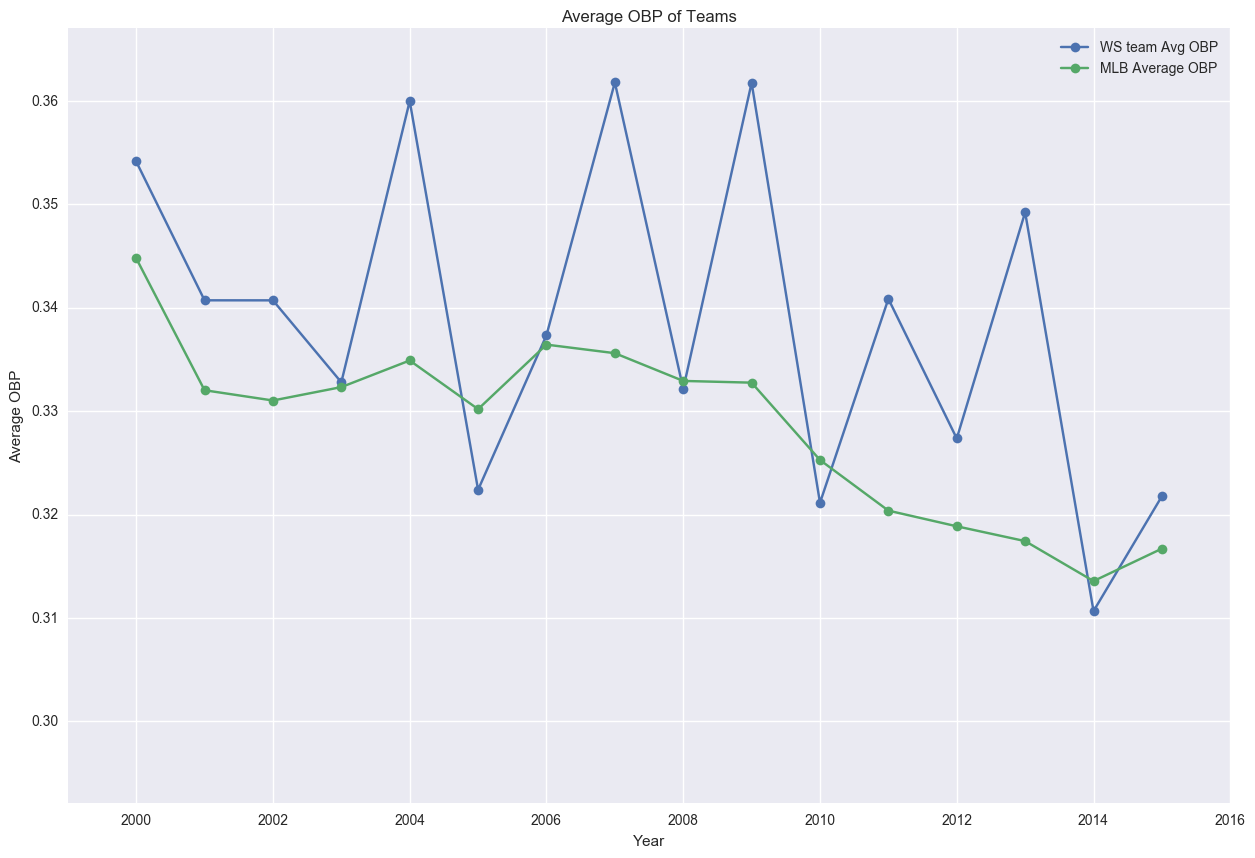

In [29]:
# Setting the size of the dimensions for the plt
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)

# Plotting OBP for worldseries winners and comparing them to the average OBP
plt.plot(ws_years, ws_winners_obp, marker = "o", label = "WS team Avg OBP")
plt.plot(ws_years, yr_avg_obp, marker = "o", label = "MLB Average OBP")
plt.xlim(ws_years.min() - 1, ws_years.max() + 1)
plt.ylim(teams_obp_df["OBP"].min(), teams_obp_df["OBP"].max())
plt.xlabel("Year")
plt.ylabel("Average OBP")
plt.title("Average OBP of Teams")
plt.legend()

plt.show()

### OBP Analysis

* Rating	OBP
* Excellent	0.390
* Great	0.370
* Above Average	0.340
* Average	0.320
* Below Average	0.310
* Poor	0.300
* Awful	0.290

OBP rating is considered one of the statistics that measures the team's offensive ability. 
For the teams that won the world series for 2002, 2003 and 2015, their OBP exceeded the average of the League's 
average for those years. The OBP rating for the 2003 World Series team is close to the average of the league which
isn't enough to see if that helped them. The OBP rating for 2003, 2005, 2006, 2008, 2010 & 2014 winners were 
were either below or very close to the the leagues average for OBP. So could it be that it was their defensive ability
helped them to win the world series?

In [30]:
# setting up the data for plotting data for WHIP
ws_winners_whip = pd.Series(ws_win_stats["WHIP"])
yr_avg_whip = pd.Series(grpby_yr_avg_whip["WHIP"])

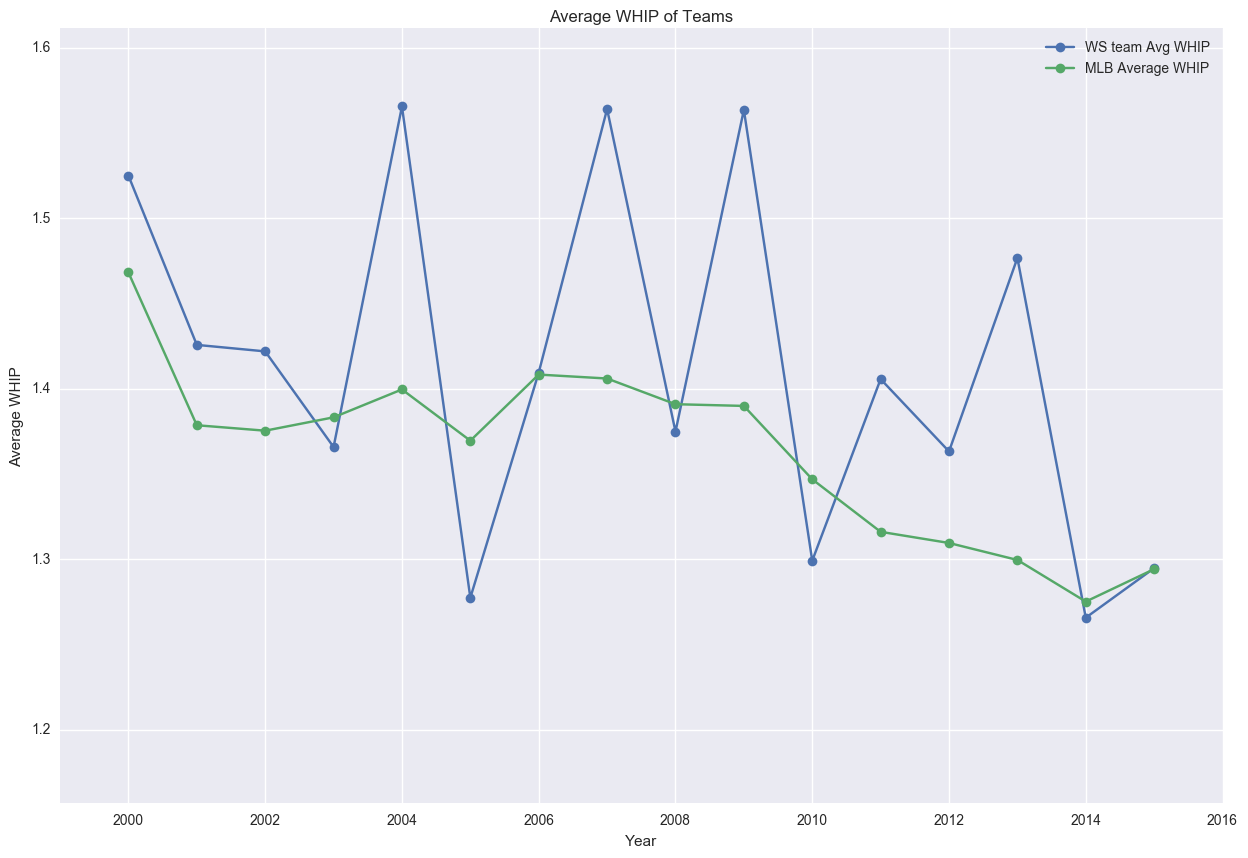

In [31]:
# Setting the size of the dimensions for the plt
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)

# Plotting WHIP for worldseries winners and comparing them to the average WHIP
plt.plot(ws_years, ws_winners_whip, marker = "o", label = "WS team Avg WHIP")
plt.plot(ws_years, yr_avg_whip, marker = "o", label = "MLB Average WHIP")
plt.xlim(ws_years.min() - 1, ws_years.max() + 1)
plt.ylim(teams_whip_df["WHIP"].min(), teams_whip_df["WHIP"].max())
plt.xlabel("Year")
plt.ylabel("Average WHIP")
plt.title("Average WHIP of Teams")
plt.legend()

plt.show()

### WHIP Analysis

Rating	WHIP
* Excellent	1.00
* Great	1.10
* Above Average	1.20
* Average	1.30
* Below Average	1.40
* Poor	1.50
* Awful	1.60

The stat WHIP, is one of the stats used to measure a team's defense ability. It's pretty much used to measure 
the pitcher's ability. The lower the value the better for WHIP. Something that I didn't anticipate and that is 
there seems to be a correlation between a team's WHIP and OBP in terms of the World Series winners. 
 
The only World Series winners who had good WHIP ratings ie less than the league's average were the 2003, 2005, 2008, 2010 & 2014. So it would seem that their defensive ability is what enabled them to win those years. Both 2006 & the 2015 World Series winners' WHIP rating was the same as the League's average. 


## Conclusion

It's something that wasn't anticipated in this analysis and that there was a strong correlation between the WHIP ratings and the 
OBP ratings for the World Series winners. 

It is true with exceptions, that paying good money for good players helps. Because it has been found that there are
franchises whose average pay is less than the average salary of the league. 

It was observed from the OBP and WHIP graphs, that teams that had a strong offense (OBP) in general had a weaker defense (WHIP). This is true conversely.
So it seems that it was either they had a strong offensive ability or strong defensive ability but not both.
So in line with the salary, it would be that teams that paid good money towards a particular bias in either 
pitching (defensive - WHIP) or batting (offensive - OBP). For example, the 2005 winner, may have had good pitchers
on their team and paid them well.

### Limitations of the analysis 
* As highlighted, there was data missing. In the teams dataset, it was found in a couple of columns there wasn't any data available prior to 2000. These values were important as they were used to calculate a Team's OBP rating. It would have been beneficial to have access to such data from 1985 onwards. This will allow for an analysis over a longer period of time.

* Analysing WHIP ratings is not enough in evaluating a team's defensive ability. There is another stat that I wanted to use and that was the Defensive Efficiency Rating (DER). It's normally calculated at the Team level and quoting the website https://www.sportingcharts.com/dictionary/mlb/defensive-efficiency-rating-der.aspx": "The purpose of DER is to determine the overall effectiveness of the fielding defense of a baseball team. The higher the DER, the better the team's fielding ability is considered to be". It would have been better to evaluate a team's fielding ability. In order to calculate the DER, there is an absence from the teams' data which is Plate Appearances(PA). This prevented the ability to calculate at least the team's DER. This would allowed for better analysis and thereby to  be able to find out any potential causation towards winning the world series.

* There are lots of data available to be able to calculate a team's offensive ability. However, calculating a team's defensive abilityis not simple as there is a debate as to whether it can be measured through data or is it by just observing an individual's ability to field. This is highlighted by this article http://sabr.org/research/measuring-defense-entering-zones-fielding-statistics.  

# Reference

* Which Baseball Statistic Is the Most Important When Determining Team Success? - https://www.iwu.edu/economics/PPE13/houser.pdf
* Baseball statistics - https://en.wikipedia.org/wiki/Baseball_statistics
* Defensive Efficiency Rating (DER) -  https://www.sportingcharts.com/dictionary/mlb/defensive-efficiency-rating-der.aspx
* Measuring Defense: Entering  Zones Fielding Statistics - http://sabr.org/research/measuring-defense-entering-zones-fielding-statistics.

In [32]:
##########################################################################################################
# The Code below is not used at all for the above analysis... 
# It's there as a reference for future code where it could be handy.
##########################################################################################################

#plt.figure(figsize=(len(teams) * 0.75, len(teams) * 10))
#for team in teams:
#    year_sal = pd.Series(teamsal_mean_results.loc[teamsal_mean_results["teamID"] == team]["yearID"])
#    team_sal = pd.Series(teamsal_mean_results.loc[teamsal_mean_results["teamID"] == team]["salary"])
#    plt.subplot(len(teams), 1, teams[teams == team].index[0] + 1)
#    plt.plot(year_sal, team_sal, marker = "o", label = team)
#    plt.plot(years, yearsal_salary, marker = "o", label = "MLB")
#    plt.xlim(years.min(), years.max())
#    plt.ylim(teamsal_mean_results["salary"].min(), teamsal_mean_results["salary"].max())
#    plt.xlabel("Year")
#    plt.ylabel("Average Salary")
#    plt.title("Mean salary of Players for " + team)
#    plt.legend()


#plt.show()

